In [21]:
# simulate a AR process
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

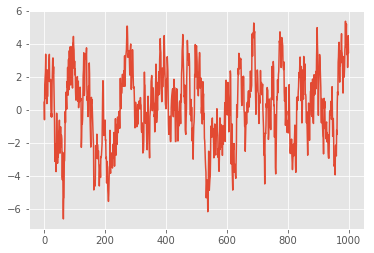

In [12]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [13]:
# estimate a AR model

In [14]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1, 0))
result = mod.fit()

In [15]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1411.053
Method:                       css-mle   S.D. of innovations              0.991
Date:                Fri, 16 Aug 2019   AIC                           2828.107
Time:                        15:33:43   BIC                           2842.830
Sample:                             0   HQIC                          2833.702
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.309      0.751      0.453      -0.374       0.838
ar.L1.y        0.8995      0.014     65.344      0.000       0.873       0.927
                                    Roots           

In [16]:
# extract coefs
print(result.params)

[0.23219505 0.89954001]


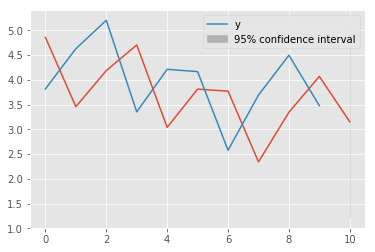

In [26]:
# forecasting an AR model
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1, 0))
res = mod.fit()
res.plot_predict(start=990, end=1000)
plt.show()

In [22]:
# information criteria - how to find the correct model

In [23]:
res.aic

2828.106537611665

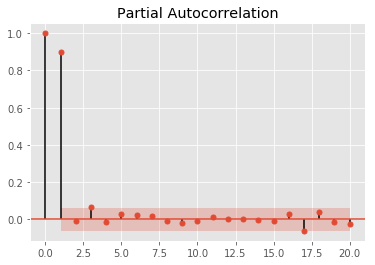

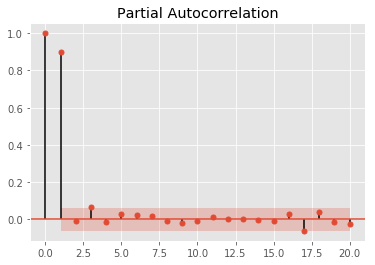

In [24]:
plot_pacf(simulated_data, lags=20, alpha=0.05)

In [30]:
# interest data
interest_rate = pd.read_csv('Data/TNX.csv', parse_dates = ['Date'])
interest_rate = interest_rate[['Date', 'Adj Close']]
interest_rate.index = interest_rate['Date']
interest_rate = interest_rate.drop('Date', 1)
interest_rate.columns = ['rate']
interest_rate.head()

,rate
Date,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [31]:
# compare AR model with random walk

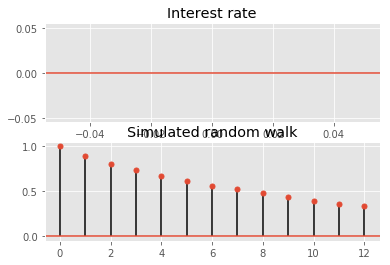

In [33]:
fig, axes = plt.subplots(2, 1)
fig = plot_acf(interest_rate, alpha = 1, lags=12, ax=axes[0])
fig = plot_acf(simulated_data, alpha = 1, lags=12, ax=axes[1])

axes[0].set_title('Interest rate')
axes[1].set_title('Simulated random walk')
plt.show()

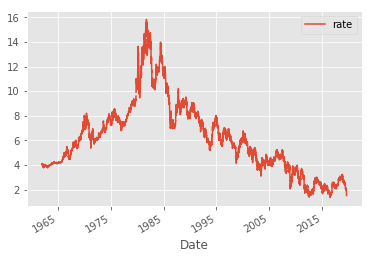

In [34]:
interest_rate.plot()

In [ ]:
# estimate order of model using PACF

In [35]:
# AR(1)
ar = np.array([1, -0.6])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

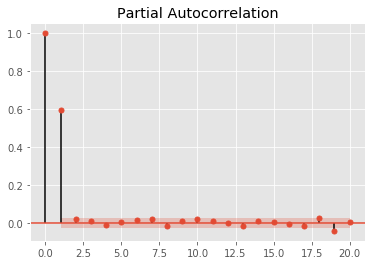

In [36]:
plot_pacf(simulated_data_1, lags=20)
plt.show()

In [37]:
# AR(2)
ar = np.array([1, 0.6, 0.3])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

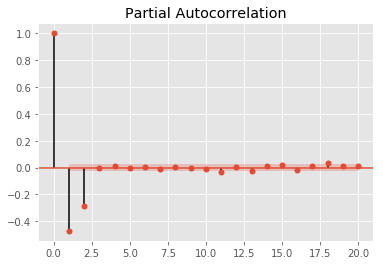

In [38]:
plot_pacf(simulated_data_2, lags=20)
plt.show()

In [39]:
# information criteria - find best model

In [40]:
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
    BIC[p] = res.bic

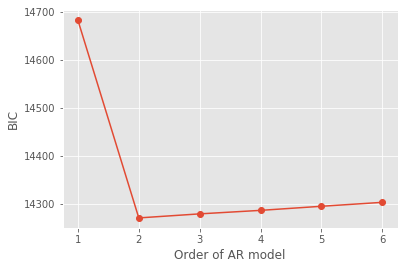

In [41]:
# plot BIC with p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('BIC')
plt.show()